## logistic regression`

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

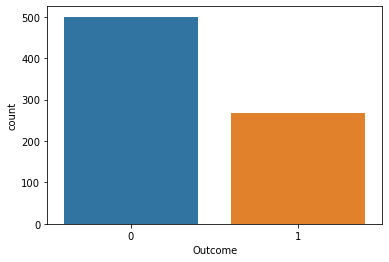

In [6]:
sns.countplot(df["Outcome"])

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### train test split

In [10]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [9]:
500 / (500+ 268) # 0.6510416666666666

0.6510416666666666

In [12]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [14]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
y_train.value_counts()

0    401
1    213
Name: Outcome, dtype: int64

In [23]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

#### Model Training

In [24]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

##### Evaluation

In [25]:
y_pred = lg_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix \n",cnf_matrix)

accuarcy = accuracy_score(y_test, y_pred)
print("accuarcy \n",accuarcy)

clf_report = classification_report(y_test, y_pred)
print("classification report\n",clf_report)

confusion matrix 
 [[105  20]
 [ 32  35]]
accuarcy 
 0.7291666666666666
classification report
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



In [26]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [33]:
print("classification report\n",clf_report)

classification report
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



In [42]:
y_pred = lg_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
y_pred = lg_model.predict_proba(x_test)
y_pred
   0 class     1 class
[[0.56518312, 0.43481688], > 0 class
[0.66068054, 0.33931946],  > 0  class
[0.90098634, 0.09901366], >> 0 class
[0.54816629, 0.45183371] >> 0 class
0.19311763, 0.80688237], >> 1 class

array([[0.56518312, 0.43481688],
       [0.66068054, 0.33931946],
       [0.90098634, 0.09901366],
       [0.54816629, 0.45183371],
       [0.19311763, 0.80688237],
       [0.81816032, 0.18183968],
       [0.65768847, 0.34231153],
       [0.97952072, 0.02047928],
       [0.36563755, 0.63436245],
       [0.96177338, 0.03822662],
       [0.76913105, 0.23086895],
       [0.26351122, 0.73648878],
       [0.73146058, 0.26853942],
       [0.89512644, 0.10487356],
       [0.45914919, 0.54085081],
       [0.06034221, 0.93965779],
       [0.34155558, 0.65844442],
       [0.90193352, 0.09806648],
       [0.96981754, 0.03018246],
       [0.73889436, 0.26110564],
       [0.92160227, 0.07839773],
       [0.84058844, 0.15941156],
       [0.90007591, 0.09992409],
       [0.20893634, 0.79106366],
       [0.11214326, 0.88785674],
       [0.18453323, 0.81546677],
       [0.88046257, 0.11953743],
       [0.93043884, 0.06956116],
       [0.09418922, 0.90581078],
       [0.22658926, 0.77341074],
       [0.